# LSTM
https://slundberg.github.io/shap/notebooks/deep_explainer/Keras%20LSTM%20for%20IMDB%20Sentiment%20Classification.html

In [1]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt

2022-11-24 09:27:53.382713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 09:27:53.599375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-24 09:27:53.599396: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-24 09:27:53.628656: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-24 09:27:54.539437: W tensorflow/stream_executor/platform/de

In [2]:
max_features = 20000
max_len = 80
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
x_train.shape, x_test.shape

((25000, 80), (25000, 80))

In [3]:
model_layers = [
    Embedding(max_features, 128),
    LSTM(128),
    Dense(1, activation='sigmoid'),
]
model = Sequential(model_layers)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

2022-11-24 09:28:00.225621: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-24 09:28:00.225649: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-24 09:28:00.225674: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-11-24 09:28:00.225904: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 93s 117ms/step - loss: 0.4301 - accuracy: 0.8002 - val_loss: 0.3923 - val_accuracy: 0.8246
Epoch 2/10
782/782 [==============================] - 90s 115ms/step - loss: 0.2477 - accuracy: 0.9007 - val_loss: 0.3793 - val_accuracy: 0.8351
Epoch 3/10
782/782 [==============================] - 59s 76ms/step - loss: 0.1537 - accuracy: 0.9418 - val_loss: 0.4556 - val_accuracy: 0.8264
Epoch 4/10
782/782 [==============================] - 58s 75ms/step - loss: 0.1038 - accuracy: 0.9620 - val_loss: 0.5342 - val_accuracy: 0.8269
Epoch 5/10
782/782 [==============================] - 60s 76ms/step - loss: 0.0682 - accuracy: 0.9765 - val_loss: 0.7071 - val_accuracy: 0.8244
Epoch 6/10
782/782 [==============================] - 60s 77ms/step - loss: 0.0425 - accuracy: 0.9856 - val_loss: 0.6880 - val_accuracy: 0.8192
Epoch 7/10
782/782 [==============================] - 60s 77ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.7763 - val_accurac

In [5]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.430052,0.80020,0.392329,0.82460
1,0.247703,0.90072,0.379347,0.83512
2,0.153674,0.94180,0.455573,0.82644
3,0.103789,0.96196,0.534168,0.82692
4,0.068204,0.97652,0.707148,0.82436
5,0.042504,0.98564,0.688045,0.81924
6,0.035275,0.98872,0.776278,0.82184
7,0.024320,0.99236,0.812253,0.82076
8,0.018794,0.99408,0.874425,0.81268
9,0.015897,0.99520,0.967190,0.81936


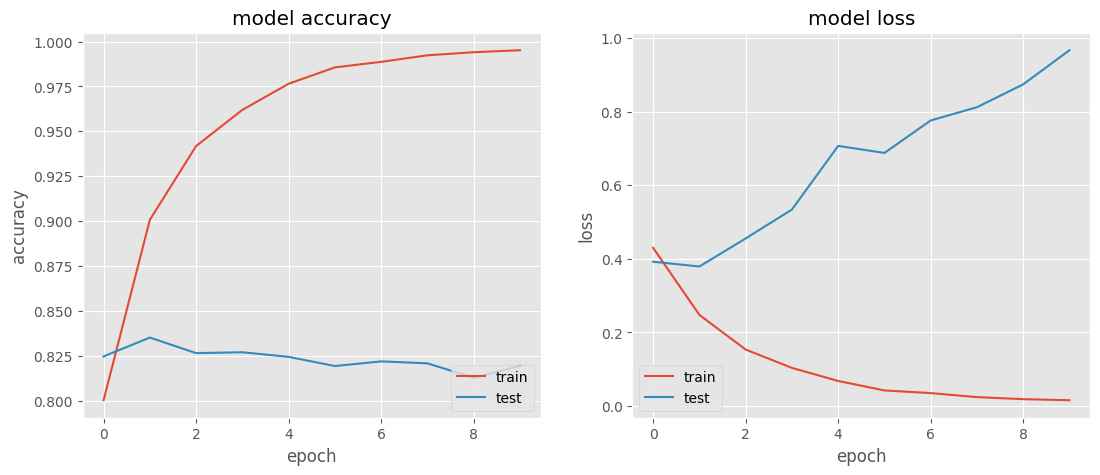

In [6]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

plt.sca(axis[0])
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="test")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

plt.sca(axis[1])
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower left');